<a href="https://colab.research.google.com/github/iMan0405/artificial_intelligence/blob/master/%22AI_Toshkent_shahrida_uylarning_narxini_aniqlash%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [45]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

Kutubxonlarni chaqiramiz

In [46]:
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

df ning ko'rish uchun 5 qator chiqaramiz

In [47]:
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


df haqida ma'lumotlarni olamiz

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


df ning size ustunidagi qiymatlarni ko'ramiz

In [49]:
df['size'].values

array(['57', '52', '42', ..., '64', '18', '30'], dtype=object)

df ning size ustinida 1 ta text ko'rinishidagi ma'lumotni olib tashlaymiz 

In [50]:
df.drop([5347], inplace=True)

ma'lumot olib tasghlanganligini tekshirib ko'ramiz

In [51]:
df[df['size'] == 'Площадьземли:1сот']

,location,district,rooms,size,level,max_levels,price


df haqida yana bir bor ma'lumot olamiz

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7564 non-null   object
 1   district    7564 non-null   object
 2   rooms       7564 non-null   int64 
 3   size        7564 non-null   object
 4   level       7564 non-null   int64 
 5   max_levels  7564 non-null   int64 
 6   price       7564 non-null   object
dtypes: int64(3), object(4)
memory usage: 472.8+ KB


df ning price ustunidagi text qiymatlari qator indexlarini yangi o'zgaruvchiga saqlab olamiz

In [53]:
dfindex = df[df['price'] == 'Договорная'].index
dfindex

Int64Index([ 202,  411,  439,  460,  507,  521,  522,  523,  584,  800,  873,
             880,  882,  883,  886,  892,  988, 1027, 1318, 1541, 1601, 1804,
            1805, 2004, 2006, 2580, 2625, 2673, 2705, 2797, 2894, 2942, 3431,
            3436, 3454, 3455, 3456, 3470, 3495, 3510, 3528, 3535, 3536, 3572,
            3574, 3589, 3605, 3637, 3677, 3711, 3712, 3713, 3714, 4061, 4158,
            4188, 4278, 4298, 4328, 4361, 4420, 4425, 4453, 4659, 4746, 4747,
            4879, 5002, 5003, 5004, 5105, 5637, 5801, 5838, 5848, 5887, 5920,
            6099, 6542, 6602, 6603, 6604, 6605, 6606, 6607, 6608, 6639, 6662,
            6738, 6819, 6836, 6843, 6859, 6954, 7039, 7196, 7323, 7403, 7404],
           dtype='int64')

ushbu ustunlarni o'chirib tashlaymiz

In [54]:
df.drop(dfindex, inplace=True)

qatorlar o'chganligini tekshirib ko'ramiz

In [55]:
df[df['price'] == 'Договорная']

,location,district,rooms,size,level,max_levels,price


df haqida yan bir bor ma'lumot olamiz

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7465 non-null   object
 1   district    7465 non-null   object
 2   rooms       7465 non-null   int64 
 3   size        7465 non-null   object
 4   level       7465 non-null   int64 
 5   max_levels  7465 non-null   int64 
 6   price       7465 non-null   object
dtypes: int64(3), object(4)
memory usage: 466.6+ KB


sonli ustunlar turini int64 ga o'zgartiramiz

In [57]:
df['rooms'] = df['rooms'].astype('float')
df['size'] = df['size'].astype('float')
df['level'] = df['level'].astype('float')
df['max_levels'] = df['max_levels'].astype('float')
df['price'] = df['price'].astype('float')

df haqida ma'lumot olamiz

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7465 non-null   object 
 1   district    7465 non-null   object 
 2   rooms       7465 non-null   float64
 3   size        7465 non-null   float64
 4   level       7465 non-null   float64
 5   max_levels  7465 non-null   float64
 6   price       7465 non-null   float64
dtypes: float64(5), object(2)
memory usage: 466.6+ KB


Ma'lumotlarni grafikda ko'rish

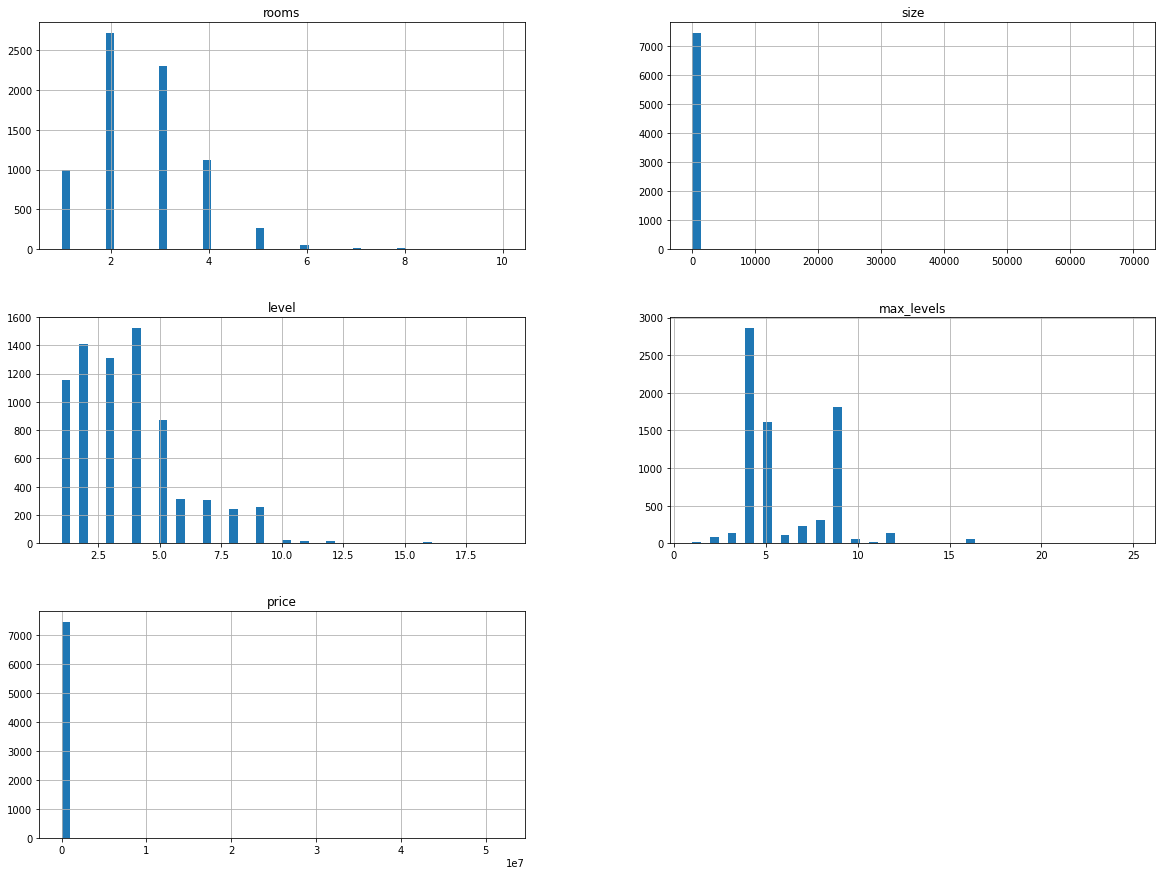

In [59]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 15))
plt.show()

train set va test setni yaratish

In [60]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

train_set dan 10 tasini ko'ramiz

In [61]:
train_set.head(10)

,location,district,rooms,size,level,max_levels,price
436,"город Ташкент, Юнусабадский район, Юнусабад 9-...",Юнусабадский,2.0,60.0,4.0,4.0,34000.0
760,"город Ташкент, Мирзо-Улугбекский район, 1-й пр...",Мирзо-Улугбекский,1.0,30.0,1.0,2.0,19500.0
3596,"город Ташкент, Мирабадский район, Тонг Юлдузи",Мирабадский,4.0,122.0,3.0,5.0,65000.0
5988,"город Ташкент, Мирабадский район, Шахрисабз",Мирабадский,2.0,62.0,3.0,9.0,53000.0
5505,"город Ташкент, Учтепинский район, Чиланзар 11-...",Учтепинский,2.0,52.0,1.0,5.0,53000.0
2780,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1.0,38.0,4.0,4.0,26000.0
2440,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,3.0,153.0,2.0,9.0,112000.0
5121,"город Ташкент, Мирзо-Улугбекский район, Карасу...",Мирзо-Улугбекский,4.0,93.0,3.0,5.0,60000.0
6335,"город Ташкент, Чиланзарский район, Чиланзар 8-...",Чиланзарский,2.0,63.0,5.0,9.0,40300.0
1067,"город Ташкент, Чиланзарский район, Домбрабад",Чиланзарский,2.0,46.0,2.0,4.0,32000.0


Test_set dan 10 tasini ko'ramiz

In [62]:
test_set.head(10)

,location,district,rooms,size,level,max_levels,price
2301,"город Ташкент, Яшнободский район, Паркентский ...",Яшнободский,3.0,86.0,4.0,9.0,89000.0
6126,"город Ташкент, Учтепинский район, Чиланзар 22-...",Учтепинский,3.0,70.0,2.0,5.0,43500.0
2149,"город Ташкент, Яккасарайский район, Кушбеги",Яккасарайский,3.0,90.0,5.0,5.0,45000.0
5594,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1.0,36.0,2.0,4.0,24700.0
6566,"город Ташкент, Учтепинский район, Кухна-Чупоно...",Учтепинский,4.0,100.0,1.0,4.0,87000.0
1883,"город Ташкент, Шайхантахурский район, Лабзак",Шайхантахурский,3.0,72.0,2.0,9.0,58999.0
4204,"город Ташкент, Сергелийский район, Сергели-VII",Сергелийский,3.0,85.0,1.0,9.0,59000.0
4071,"город Ташкент, Шайхантахурский район, Междунар...",Шайхантахурский,3.0,85.0,4.0,7.0,170000.0
5162,"город Ташкент, Юнусабадский район, Юнусабад-19",Юнусабадский,2.0,71.0,3.0,6.0,62000.0
2971,"город Ташкент, Чиланзарский район, Чиланзар 5-...",Чиланзарский,3.0,96.0,2.0,4.0,85000.0


muvozanatli train set va test set yaratish

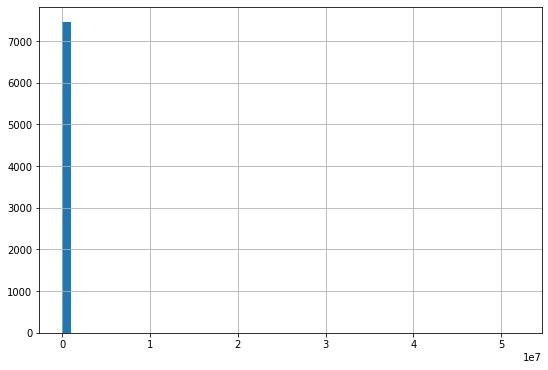

In [63]:
%matplotlib inline
df['price'].hist(bins=50, figsize=(9, 6))
plt.show()

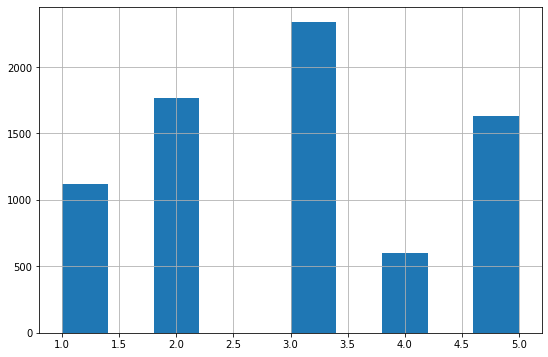

In [64]:
df['price_cat'] = pd.cut(df['price'], bins=[10000.0, 30000.0, 40000.0, 60000.0, 70000.0, np.inf], labels=[1, 2, 3, 4, 5])
df['price_cat'].hist(figsize=(9, 6))
plt.show()

In [65]:
df.head()

,location,district,rooms,size,level,max_levels,price,price_cat
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3.0,57.0,4.0,4.0,52000.0,3
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2.0,52.0,4.0,5.0,56000.0,3
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2.0,42.0,4.0,4.0,37000.0,2
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3.0,65.0,1.0,4.0,49500.0,3
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3.0,70.0,3.0,5.0,55000.0,3


In [39]:
from sklearn.model_selection import StratifiedShuffleSplit
startified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in startified_split.split(df, df['price_cat']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

ValueError: ignored

ML ga tayyorgarlik

In [66]:
housing = train_set.drop(['price', 'location'], axis=1)
housing_labels = train_set['price'].copy()

In [69]:
housing

,district,rooms,size,level,max_levels
436,Юнусабадский,2.0,60.0,4.0,4.0
760,Мирзо-Улугбекский,1.0,30.0,1.0,2.0
3596,Мирабадский,4.0,122.0,3.0,5.0
5988,Мирабадский,2.0,62.0,3.0,9.0
5505,Учтепинский,2.0,52.0,1.0,5.0
...,...,...,...,...,...
5262,Чиланзарский,3.0,78.0,7.0,9.0
5297,Чиланзарский,3.0,65.0,3.0,4.0
5462,Мирзо-Улугбекский,3.0,94.0,2.0,5.0
870,Чиланзарский,2.0,47.0,4.0,5.0


In [71]:
housing_num = housing.drop('district', axis=1)
housing_num

,rooms,size,level,max_levels
436,2.0,60.0,4.0,4.0
760,1.0,30.0,1.0,2.0
3596,4.0,122.0,3.0,5.0
5988,2.0,62.0,3.0,9.0
5505,2.0,52.0,1.0,5.0
...,...,...,...,...
5262,3.0,78.0,7.0,9.0
5297,3.0,65.0,3.0,4.0
5462,3.0,94.0,2.0,5.0
870,2.0,47.0,4.0,5.0


In [72]:
housing

,district,rooms,size,level,max_levels
436,Юнусабадский,2.0,60.0,4.0,4.0
760,Мирзо-Улугбекский,1.0,30.0,1.0,2.0
3596,Мирабадский,4.0,122.0,3.0,5.0
5988,Мирабадский,2.0,62.0,3.0,9.0
5505,Учтепинский,2.0,52.0,1.0,5.0
...,...,...,...,...,...
5262,Чиланзарский,3.0,78.0,7.0,9.0
5297,Чиланзарский,3.0,65.0,3.0,4.0
5462,Мирзо-Улугбекский,3.0,94.0,2.0,5.0
870,Чиланзарский,2.0,47.0,4.0,5.0


In [73]:
housing.describe()

,rooms,size,level,max_levels
count,5972.000000,5972.000000,5972.000000,5972.000000
mean,2.624079,109.581149,3.716678,6.057602
std,1.086222,1407.297438,2.262338,2.634307
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,50.000000,2.000000,4.000000
50%,3.000000,66.000000,3.000000,5.000000
75%,3.000000,85.000000,5.000000,9.000000
max,10.000000,69000.000000,19.000000,25.000000


Normalizatsiya va Standartizatsiya

In [74]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit_transform(housing_num)

array([[0.11111111, 0.00085508, 0.16666667, 0.125     ],
       [0.        , 0.0004203 , 0.        , 0.04166667],
       [0.33333333, 0.00175365, 0.11111111, 0.16666667],
       ...,
       [0.22222222, 0.00134785, 0.05555556, 0.16666667],
       [0.11111111, 0.00066668, 0.16666667, 0.16666667],
       [0.33333333, 0.00134785, 0.05555556, 0.33333333]])

In [75]:
from sklearn.preprocessing import StandardScaler

standart_scaler = StandardScaler()

standart_scaler.fit_transform(housing_num)

array([[-0.57458889, -0.03523441,  0.12524471, -0.78114458],
       [-1.4952878 , -0.05655365, -1.20092799, -1.54042117],
       [ 1.26680894,  0.00882535, -0.31681286, -0.40150628],
       ...,
       [ 0.34611002, -0.01107261, -0.75887042, -0.40150628],
       [-0.57458889, -0.04447275,  0.12524471, -0.40150628],
       [ 1.26680894, -0.01107261, -0.75887042,  1.11704692]])

Pipeline konveyr quramiz

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

num_pipeline.fit_transform(housing_num)

array([[-0.57458889, -0.03523441,  0.12524471, -0.78114458],
       [-1.4952878 , -0.05655365, -1.20092799, -1.54042117],
       [ 1.26680894,  0.00882535, -0.31681286, -0.40150628],
       ...,
       [ 0.34611002, -0.01107261, -0.75887042, -0.40150628],
       [-0.57458889, -0.04447275,  0.12524471, -0.40150628],
       [ 1.26680894, -0.01107261, -0.75887042,  1.11704692]])

In [77]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [79]:
housing_prepared = full_pipeline.fit_transform(housing)

In [82]:
housing_prepared[0:5,:]

array([[-0.57458889, -0.03523441,  0.12524471, -0.78114458,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.4952878 , -0.05655365, -1.20092799, -1.54042117,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.26680894,  0.00882535, -0.31681286, -0.40150628,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57458889, -0.03381313, -0.31681286,  1.11704692,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57458889, -0.04091954, -1

Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

LR_model.fit(housing_prepared, housing_labels)

LinearRegression()

Bashorat

In [84]:
predicted_labels = LR_model.predict(housing_prepared)
predicted_labels

array([ 42198.18141558,  17599.15289113, 117870.56004934, ...,
        69377.41578056,  37521.46985399, 101176.44157074])

In [86]:
predicted = pd.DataFrame({'Bashorat':predicted_labels, 'Asl narx':housing_labels})
predicted.head()

,Bashorat,Asl narx
436,42198.181416,34000.0
760,17599.152891,19500.0
3596,117870.560049,65000.0
5988,83293.722363,53000.0
5505,34642.965927,53000.0


modelni baholash

In [87]:
x_test = test_set.drop(['location', 'price'], axis=1)
x_test

,district,rooms,size,level,max_levels
2301,Яшнободский,3.0,86.0,4.0,9.0
6126,Учтепинский,3.0,70.0,2.0,5.0
2149,Яккасарайский,3.0,90.0,5.0,5.0
5594,Чиланзарский,1.0,36.0,2.0,4.0
6566,Учтепинский,4.0,100.0,1.0,4.0
...,...,...,...,...,...
6593,Шайхантахурский,3.0,80.0,6.0,9.0
4089,Шайхантахурский,6.0,500.0,2.0,2.0
441,Чиланзарский,1.0,36.0,2.0,5.0
5639,Шайхантахурский,3.0,70.0,6.0,7.0


In [88]:
y_test = test_set['price'].copy()
y_test

2301    89000.0
6126    43500.0
2149    45000.0
5594    24700.0
6566    87000.0
         ...   
6593    48000.0
4089     1800.0
441     28500.0
5639    60000.0
2538    42000.0
Name: price, Length: 1493, dtype: float64

In [89]:
x_test_prepared = full_pipeline.transform(x_test)
x_test_prepared

array([[ 0.34611002, -0.01675774,  0.12524471, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.34611002, -0.028128  , -0.75887042, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34611002, -0.01391517,  0.56730227, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.4952878 , -0.05228981, -0.75887042, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34611002, -0.028128  ,  1.00935984, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57458889, -0.04376211, -0.31681286, ...,  0.        ,
         0.        ,  0.        ]])

In [90]:
y_predicted = LR_model.predict(x_test_prepared)
y_predicted

array([ 72695.32388919,  54881.75968628,  71999.79008058, ...,
        20031.35544835, 118788.19575838,  71892.7383606 ])

O'rtacha kvadrat xatolik aniqlash

In [91]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)
print('RMSE= ', np.sqrt(mse))

RMSE=  1366742.755611274


Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()

RF_model.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [93]:
y_predicted = RF_model.predict(x_test_prepared)
y_predicted

array([80114.83333333, 52214.25      , 52011.55333333, ...,
       26204.88095238, 54137.19142857, 41131.        ])

In [94]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)
print('RMSE= ', np.sqrt(mse))

RMSE=  1369077.129996089


Cross Validation

In [95]:
x = housing
y = housing_labels

x_prepared = full_pipeline.transform(x)
x_prepared

array([[-0.57458889, -0.03523441,  0.12524471, ...,  0.        ,
         0.        ,  0.        ],
       [-1.4952878 , -0.05655365, -1.20092799, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.26680894,  0.00882535, -0.31681286, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.34611002, -0.01107261, -0.75887042, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57458889, -0.04447275,  0.12524471, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.26680894, -0.01107261, -0.75887042, ...,  0.        ,
         0.        ,  1.        ]])

In [100]:
from sklearn.model_selection import cross_val_score

mse_scores = cross_val_score(LR_model, x_prepared, y, scoring='neg_mean_squared_error', cv=5)

In [101]:
def display_scores(scores):
  print('Scores', scores)
  print('mean', scores.mean())
  print('std dev', scores.std())

In [102]:
display_scores(np.sqrt(-mse_scores))

Scores [ 35347.0746462  114385.45489157  57249.8854559   73799.65560414
 448404.97335925]
mean 145837.40879141347
std dev 153480.7203834681


In [105]:
scores = cross_val_score(RF_model, x_prepared, y, scoring='neg_mean_squared_error', cv=10)
RF_rmse_scores = np.sqrt(-scores)
display_scores(RF_rmse_scores)

Scores [130834.71713904  34304.41889937  20697.228587   156760.04102511
  74154.03098311  66911.29204576  64106.83504299  98860.20926212
 631101.48762878 187048.51540593]
mean 146477.87760192214
std dev 169078.12372459544


modelni saqlash

In [106]:
import joblib

filename = 'RF_model.jbl'
joblib.dump(RF_model, filename)

['RF_model.jbl']

In [108]:
model = joblib.load('RF_model.jbl')

In [109]:
scores = cross_val_score(model, x_prepared, y, scoring='neg_mean_squared_error', cv=10)
RF_rmse_scores = np.sqrt(-scores)
display_scores(RF_rmse_scores)

Scores [158512.76327201  32740.57665403  21113.84356927 155759.68149672
  81892.12934755  83851.58262507  64837.00451102  99216.31440561
 630663.62199725 161552.81954128]
mean 149014.03374198187
std dev 167473.67921493252
